# Wisconsin Breast Cancer Dataset

Este Dataset tiene aplicación médica, enfocada en el diágnostico de cáncer de mama.
Entre las variables predictivas se encuentran: el radio, la textura, perímetro, área, entre otros (10 features). Se calcula la media, la desviación estándar y "peor" (media de los 3 valores más grandes) de cada feature, dando un total de 30.
La variable objetivo es Diagnosis (Maligno y Benigno).

## Data Cleaning

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset (Añadiendo los títulos de las columnas, proveniente de la documentación del dataset)
column_names = ['id', 'diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']

df = pd.read_csv('wdbc.data', names=column_names)

# Limpieza de la columna ID (irrelevante) y mapeo de la columna 'diagnosis' para convertirla en valores numéricos
df = df.drop(columns=['id'])
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Validación de datos y manejo de valores faltantes
# Conteo por columna y suma de todas las columnas.
if df.isnull().sum().sum():
    print("Existen valores faltantes en el dataset.")
else:
    print("No existen valores faltantes en el dataset.")

No existen valores faltantes en el dataset.


In [3]:
# Visualización del dataset para entender la distribución de las variables y su relación con el diagnóstico
df

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Exploratory Data Analysis

In [4]:
# Resumen estadístico del dataset
df.describe()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Las escalas de los datos son muy diferentes, esto nos da la indicación de estandarizar los datos para poder hacer uso del PCA.

Variables como el mean area tiene valores arriba de 2000, mientras que mean smoothness tiene valores máximos menores de .2

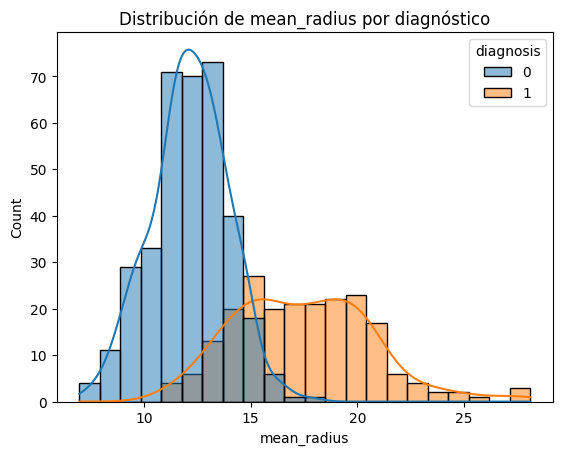

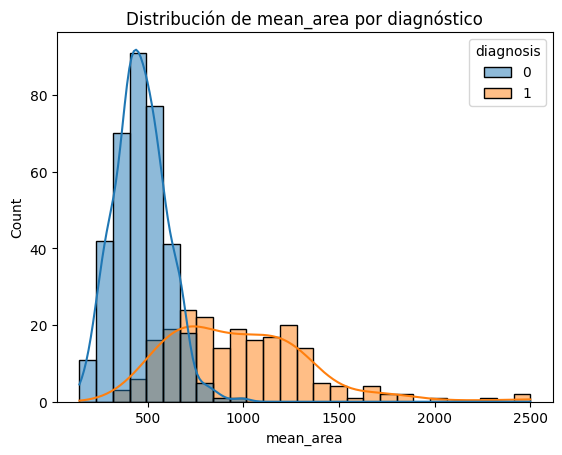

In [5]:
# Histograma de las variables 'mean_radius' y 'mean_area' para observar su distribución
sns.histplot(data = df, x='mean_radius', hue='diagnosis', kde=True)
plt.title('Distribución de mean_radius por diagnóstico')
plt.show()

sns.histplot(data = df, x='mean_area', hue='diagnosis', kde=True)
plt.title('Distribución de mean_area por diagnóstico')
plt.show()


Las células cancerígenas tienden a tener núcleos más grandes. La separación entre las curvas podría indicar un alto valor predictivo de estas variables.

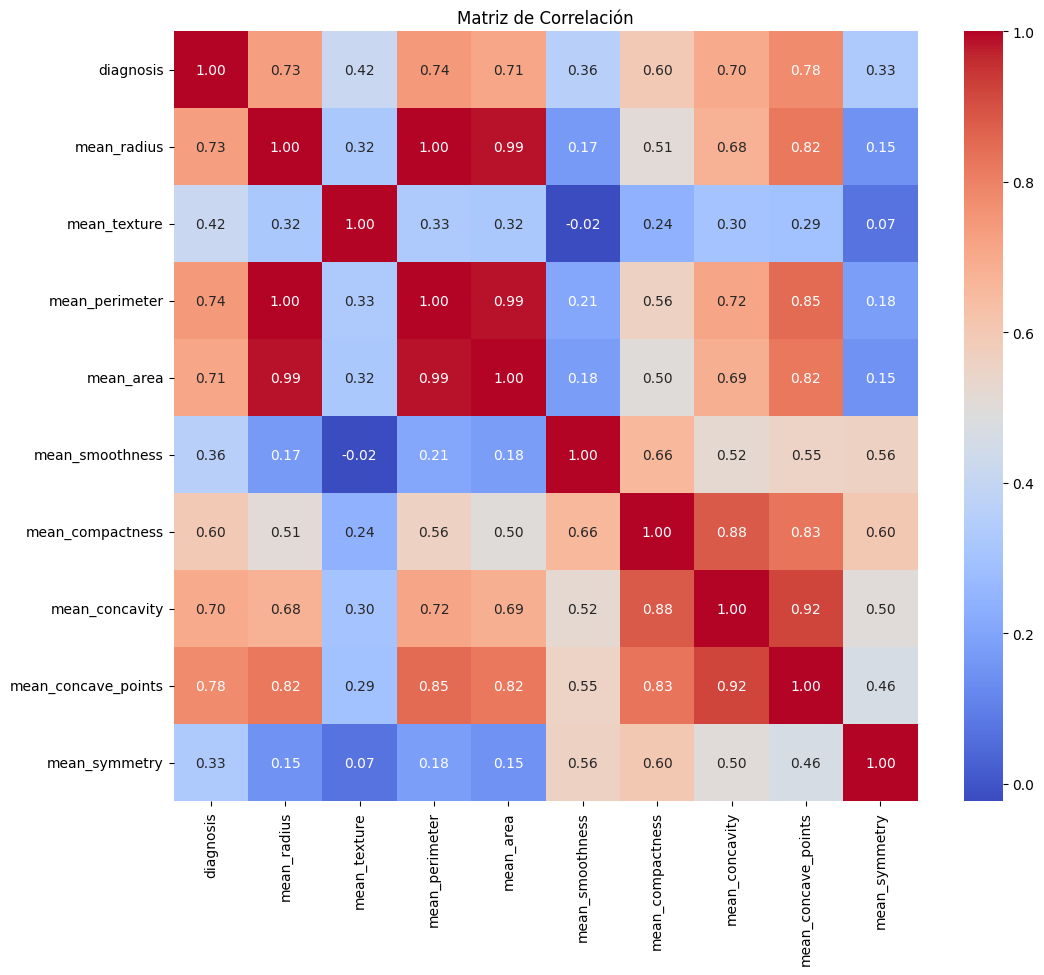

In [6]:
# Análisis de correlación entre las variables para identificar posibles relaciones
correlation_matrix = df.iloc[:, 0:10].corr() # Primeros 10 valores para claridad
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Es posible notar una correlación de más de .8 entre varios grupos de características.

Por ejemplo, área, radio y perímetro. Y Compactness, concavidad y puntos concavos. 

Esta fuerte correlación nos sirve como indicador para el uso del PCA y "simplificar" la dimensionalidad

# Data Standarization

La estandarizazión de datos es importante debido a que el PCA se basa en la varianza. Al existir una gran diferencia entre el rango de valores de las características, se puede asumir que una variable es más importante de manera errónea debido a su magnitud.

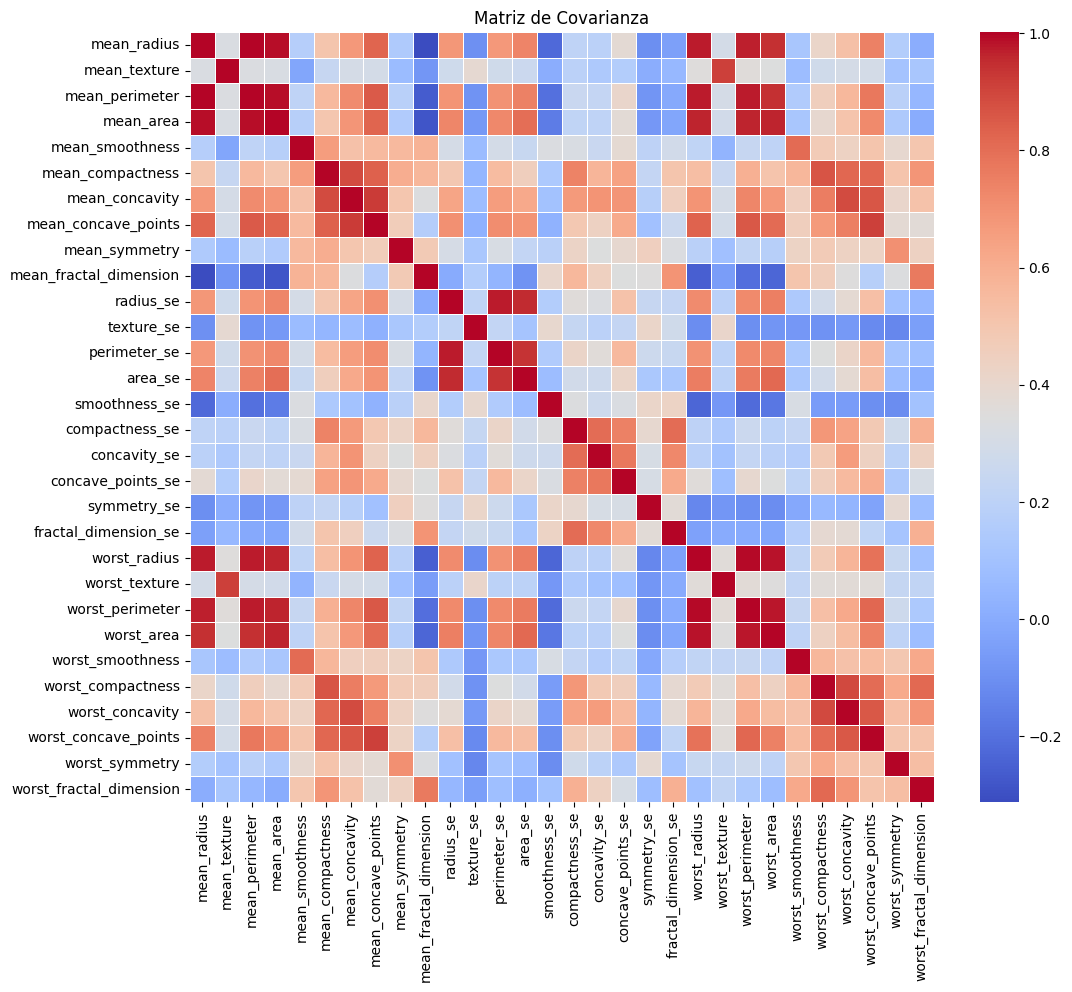

In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Estandarización
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']
X_scaled = StandardScaler().fit_transform(X)

# Matriz de covarianza
cov_matrix = np.cov(X_scaled, rowvar=False)

cov_df = pd.DataFrame(cov_matrix, index=X.columns, columns=X.columns)
plt.figure(figsize=(12, 10))
sns.heatmap(cov_df, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Covarianza')
plt.show()

Como se notó anteriormente, las características geométricas tienen una fuerte relación entre si. De igual manera, es posible notar que hay características fuertemente independientes de las demás, como lo son 'smoothness' y 'fractal_dimension'. 

Estas podrían aportar información única.

In [8]:
# Eigenvalores y eigenvectores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalores:\n", eigenvalues)

Eigenvalores:
 [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 1.33279057e-04
 7.50121413e-04 1.59213600e-03 6.91261258e-03 8.19203712e-03
 1.55085271e-02 1.80867940e-02 2.43836914e-02 2.74877113e-02
 3.12142606e-02 3.00256631e-02]


Los autovectores explican la dirección de los componentes principales, mientras que los autovalores definen la magnitud de cada eje. En este caso, los autovalores representan la cantidad de varianza que explica cada eje.

In [9]:
# Varianza explicada en porcentaje
explained_variance = eigenvalues / np.sum(eigenvalues) * 100

for i, val in enumerate(explained_variance):
    if eigenvalues[i] > 1:
        print(f"Componente {i+1}: {val:.2f}% de la varianza explicada, Autovalor mayor a 1: {eigenvalues[i]:.2f}") 
        accumulated_variance = np.sum(explained_variance[:i+1])
        k = i + 1
    else:
        print(f"Componente {i+1}: {val:.2f}% de la varianza explicada, Autovalor menor a 1: {eigenvalues[i]:.2f}")



Componente 1: 44.27% de la varianza explicada, Autovalor mayor a 1: 13.30
Componente 2: 18.97% de la varianza explicada, Autovalor mayor a 1: 5.70
Componente 3: 9.39% de la varianza explicada, Autovalor mayor a 1: 2.82
Componente 4: 6.60% de la varianza explicada, Autovalor mayor a 1: 1.98
Componente 5: 5.50% de la varianza explicada, Autovalor mayor a 1: 1.65
Componente 6: 4.02% de la varianza explicada, Autovalor mayor a 1: 1.21
Componente 7: 2.25% de la varianza explicada, Autovalor menor a 1: 0.68
Componente 8: 1.59% de la varianza explicada, Autovalor menor a 1: 0.48
Componente 9: 1.39% de la varianza explicada, Autovalor menor a 1: 0.42
Componente 10: 1.17% de la varianza explicada, Autovalor menor a 1: 0.35
Componente 11: 0.98% de la varianza explicada, Autovalor menor a 1: 0.29
Componente 12: 0.87% de la varianza explicada, Autovalor menor a 1: 0.26
Componente 13: 0.80% de la varianza explicada, Autovalor menor a 1: 0.24
Componente 14: 0.52% de la varianza explicada, Autovalor 

A partir de los autovalores podemos interpretar cuantos componentes capturan la mayoría de la varianza.
Solo serán considerados los componentes con Varianza mayor a 1, ya que se considera que todos los componentes originales tienen una varianza de 1. Aquellos valor mayor a 1, significan que condensaron información de múltiples variables, mientras que los que tengan valor menor a 1 representan que cuentan con menos información que los originales.

En este caso, los primeros 6 componentes son los que mejor representarían.

In [10]:
print(f"Varianza acumulada hasta el componente {k}: {accumulated_variance:.2f}%")

Varianza acumulada hasta el componente 6: 88.76%


In [11]:
# Matriz de transformación
# Asegurar que los eigenvectores estén ordenados según los eigenvalores
idx = np.argsort(eigenvalues)[::-1]
eigenvectors_sorted = eigenvectors[:, idx]

W = eigenvectors_sorted[:, :k]

W_df = pd.DataFrame(W, index=df.drop(columns=['diagnosis']).columns, 
                    columns=[f'PC{i+1}' for i in range(k)])
print("Matriz de transformación W:\n", W_df.head(10))


Matriz de transformación W:
                              PC1       PC2       PC3       PC4       PC5  \
mean_radius             0.218902 -0.233857 -0.008531  0.041409 -0.037786   
mean_texture            0.103725 -0.059706  0.064550 -0.603050  0.049469   
mean_perimeter          0.227537 -0.215181 -0.009314  0.041983 -0.037375   
mean_area               0.220995 -0.231077  0.028700  0.053434 -0.010331   
mean_smoothness         0.142590  0.186113 -0.104292  0.159383  0.365089   
mean_compactness        0.239285  0.151892 -0.074092  0.031795 -0.011704   
mean_concavity          0.258400  0.060165  0.002734  0.019123 -0.086375   
mean_concave_points     0.260854 -0.034768 -0.025564  0.065336  0.043861   
mean_symmetry           0.138167  0.190349 -0.040240  0.067125  0.305941   
mean_fractal_dimension  0.064363  0.366575 -0.022574  0.048587  0.044424   

                             PC6  
mean_radius             0.018741  
mean_texture           -0.032179  
mean_perimeter          0.017

La transformada sirve para proyectar los datos del espacio original hacia un subespacio simplificado. (Pasar de un espacio 569x30 a uno 30x6 que representa la misma información)

X' = X_scaled * W 

In [12]:
# Proyección de los datos originales en el nuevo espacio de características
X_pca = X_scaled.dot(W)

# Dataframe con los componentes principales
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(k)])
pca_df['diagnosis'] = y.values

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,diagnosis
0,9.192837,1.948583,-1.123166,3.633731,1.195110,1.411424,1
1,2.387802,-3.768172,-0.529293,1.118264,-0.621775,0.028656,1
2,5.733896,-1.075174,-0.551748,0.912083,0.177086,0.541452,1
3,7.122953,10.275589,-3.232790,0.152547,2.960878,3.053422,1
4,3.935302,-1.948072,1.389767,2.940639,-0.546747,-1.226495,1
...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,0.074824,-2.375193,1
565,3.793382,-3.584048,2.088476,-2.506028,0.510723,-0.246710,1
566,1.256179,-1.902297,0.562731,-2.089227,-1.809991,-0.534447,1
567,10.374794,1.672010,-1.877029,-2.356031,0.033742,0.567936,1


# 2D Visualization

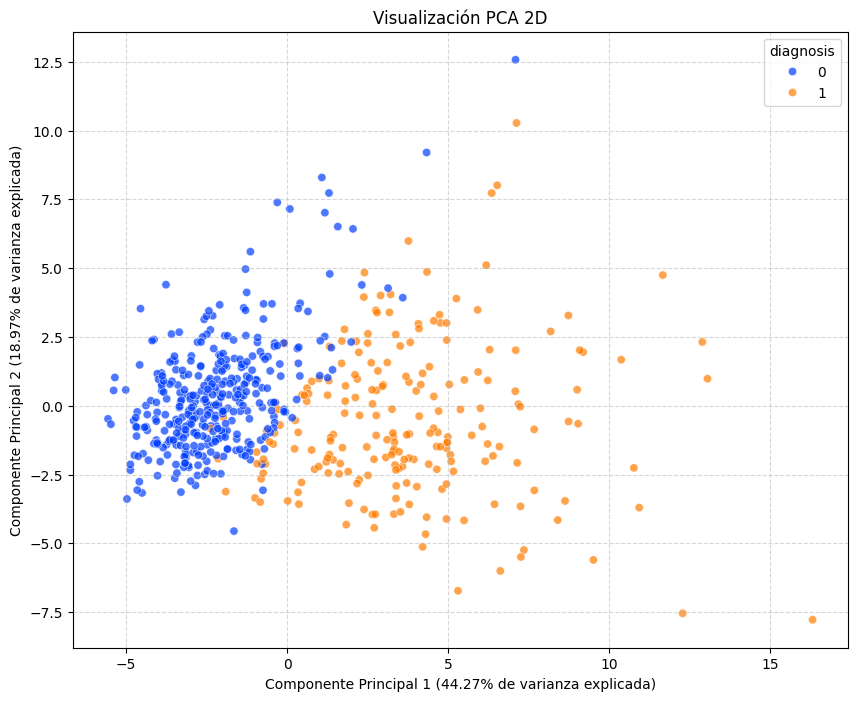

In [35]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='diagnosis', palette='bright', alpha=0.7)
plt.title('Visualización PCA 2D')
plt.xlabel(f'Componente Principal 1 ({explained_variance[0]:.2f}% de varianza explicada)')
plt.ylabel(f'Componente Principal 2 ({explained_variance[1]:.2f}% de varianza explicada)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Se puede notar una fuerte separación entre las muestras malignas y benignas. Esta clusterización nos da un indicador de que el subespacio es representativo.

# 3D Visualization

In [33]:
import plotly.express as px

fig= px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',
                color='diagnosis', title='Visualización PCA 3D',
                labels={'PC1': f'Componente Principal 1 ({explained_variance[0]:.2f}% varianza)',
                        'PC2': f'Componente Principal 2 ({explained_variance[1]:.2f}% varianza)',
                        'PC3': f'Componente Principal 3 ({explained_variance[2]:.2f}% varianza)'})

fig.show()

Al proyectarlo en un subespacio de 3 dimensiones se aprecia todavía más la clusterización antes mencionada.

# Conclusiones

La técnica fue muy efectiva en este dataset, ya que permitió reducir las 30 dimensiones originales a solo 6 componentes principales, manteniendo el 88.76% de la varianza total de los datos originales. Demostrando así que gran parte de la información médica era redundante.

El análisis de los autovalores permitió identificar que los primeros 6 componentes capturan patrones significativos, mientras que la visualización 2D y 3D mostraba una separación clara de las clasificaciones, validando así que el PCA extrajo características esenciales para el diagnóstico.

Al trabajar con 6 componentes ortogonales en lugar de 30 correlacionados, trabajar con modelos de neurona tendrá una convergencia más rápida, un menor costo computacional y un riesgo reducido de overfitting.


https://github.com/Carlos-HC/02-Principal-Component-Analysis

# Referencias

Wolberg, W., Mangasarian, O., Street, N., & Street, W. (1993). Breast Cancer Wisconsin (Diagnostic) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B. 